# Итоговая работа

### Выполнил: Кузнецов С.И.

1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений
биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли
содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –
malicious). Описание данных доступно на сайте https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
import pandas as pd

In [2]:
data_breast = pd.read_csv('data_breast.csv')
data_breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Информация о типах данных, входящих в датасет
data_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Видно, что все переменные, за исключением 'id', 'diagnosis' и 'Unnamed: 32' являются ненулевыми числовыми переменными.

Появление переменной 'Unnamed: 32' связано с тем, что первая строка исходного файла содержит лишнюю запятую:


*..."concave points_worst","symmetry_worst","fractal_dimension_worst"* **,**

Поэтому мы можем избавиться от этой переменной.

In [4]:
data_breast = data_breast[data_breast.columns[data_breast.columns != 'Unnamed: 32']]
data_breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [6]:
# Запишем названия нечисловых переменных:
non_number_vars_names = ('id', 'diagnosis')
non_number_vars_names

# В данном случае считаем, что 'id' - тоже не числовая переменная, несмотря на то, что ее тип числовой.
# Смысл переменной 'id' - однозначно идентифицировать пациента. 
# Эта переменная не имеет никакого отношения к измеримым величинам.

('id', 'diagnosis')

In [7]:
# Запишем основные статистики в отдельный dataframe
features_list = data_breast.columns[~data_breast.columns.isin(non_number_vars_names)]
df_stats = data_breast[features_list].describe()
df_stats

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


3. Выбрать стратегию для работы с пропущенными значениями.

*Исходный датасет не содержит пропущенных значений*

4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
# Матрица корреляций:
data_breast_corr = data_breast[features_list].corr()

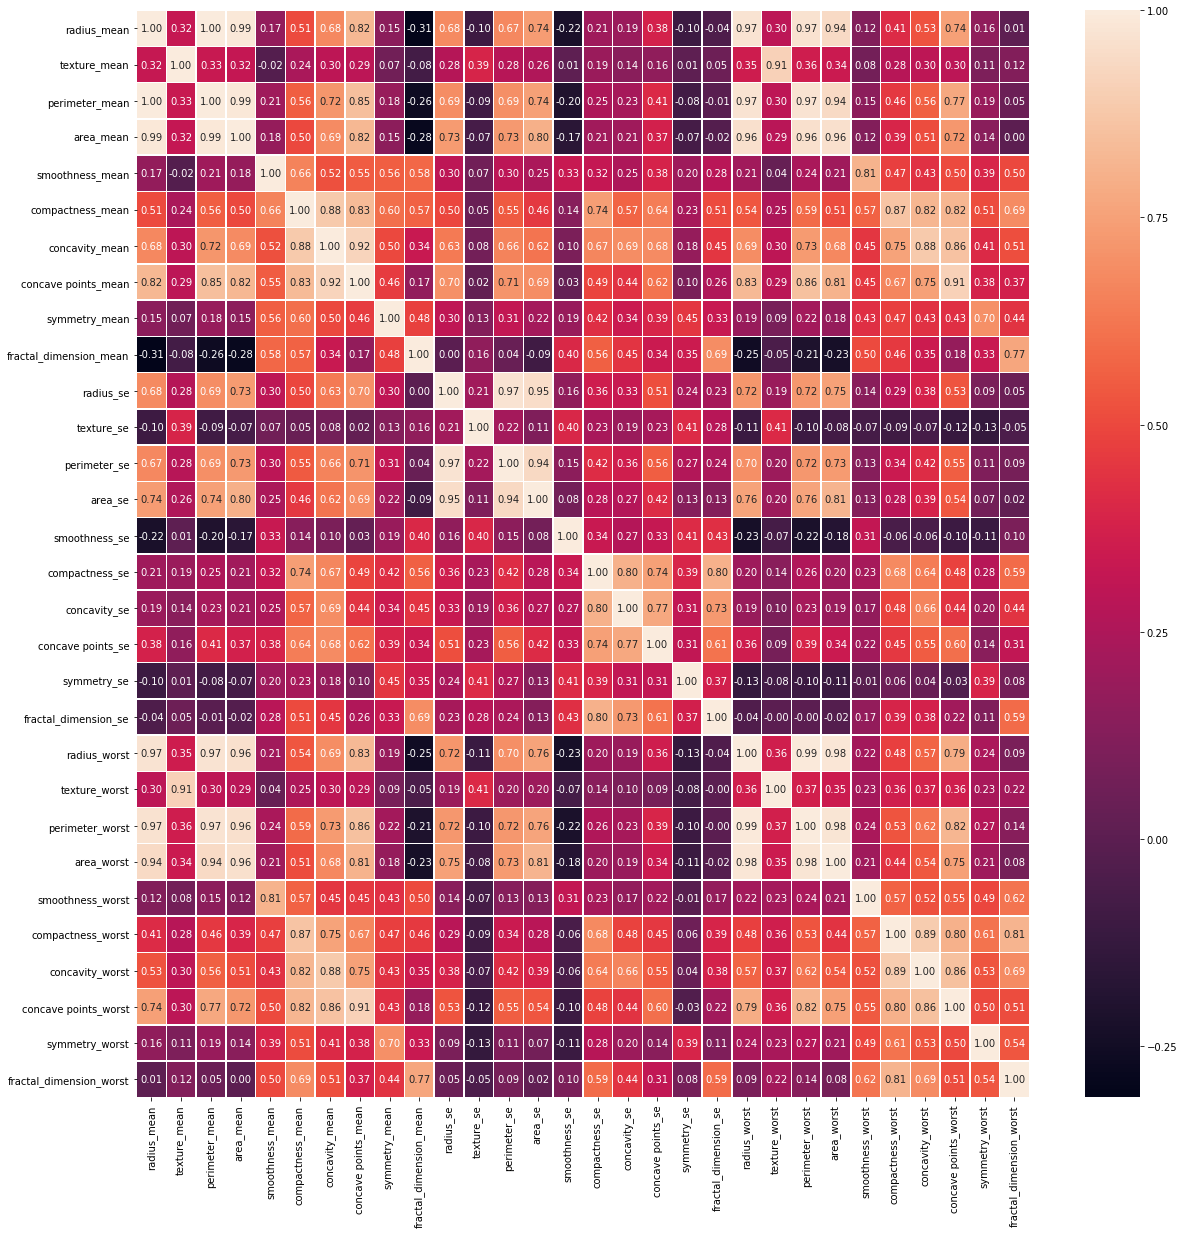

In [10]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(data_breast_corr, 
                annot=True, 
                xticklabels=data_breast_corr.columns.values, 
                yticklabels=data_breast_corr.columns.values,
                fmt=".2f", 
                linewidths=0.5
               )

5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

Мы видим несколько групп целевых переменных. Построим зависимости между ними.

/home/sergmath/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


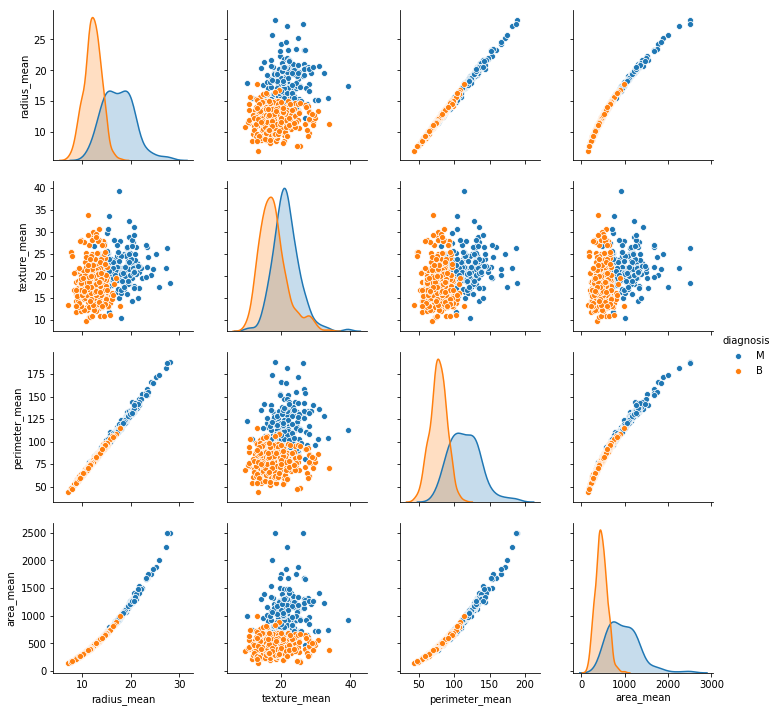

In [11]:
_ = sns.pairplot(
    data_breast[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']],
    hue="diagnosis")

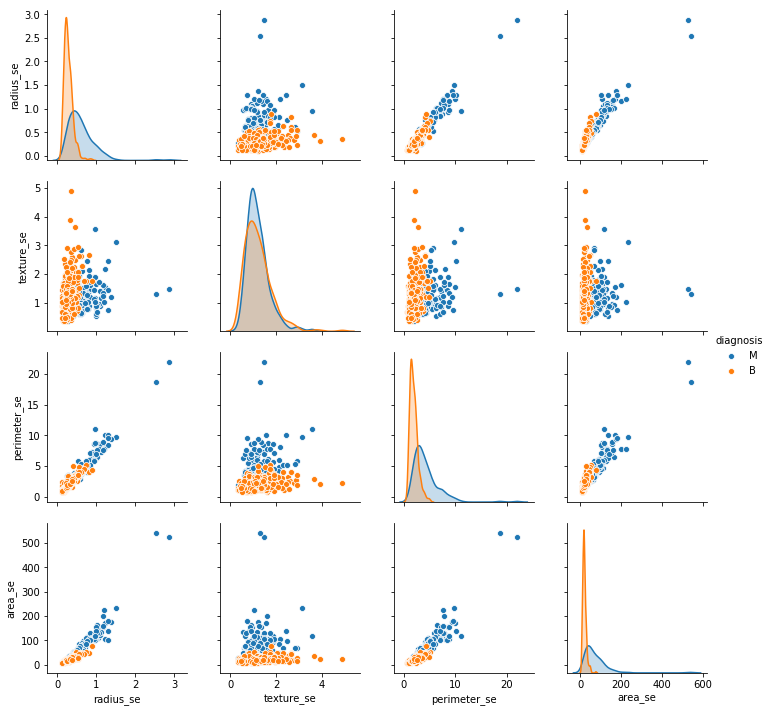

In [12]:
_ = sns.pairplot(
    data_breast[['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'diagnosis']],
    hue="diagnosis")

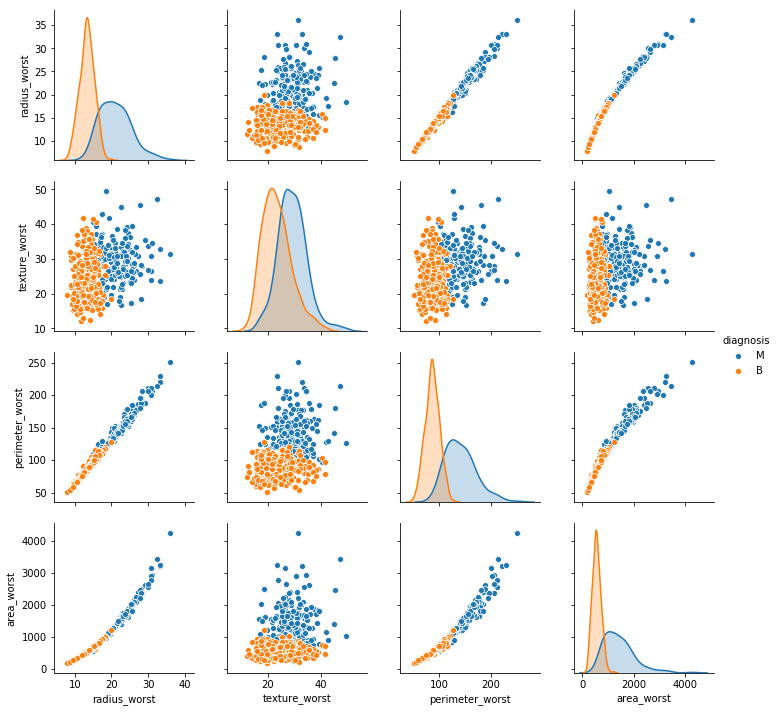

In [13]:
_ = sns.pairplot(
    data_breast[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']],
    hue="diagnosis")

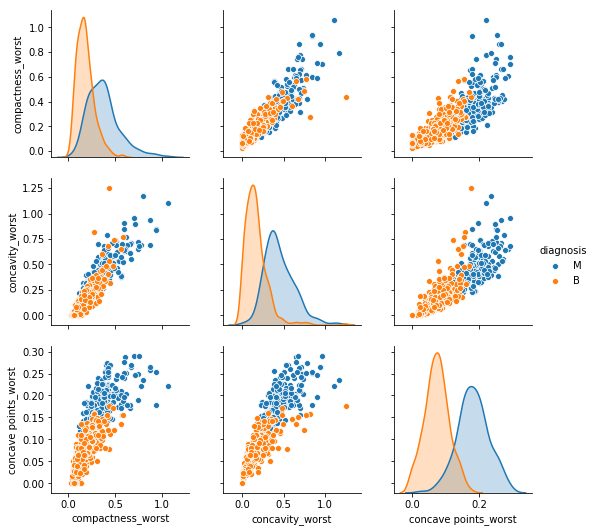

In [14]:
_ = sns.pairplot(
    data_breast[['compactness_worst', 'concavity_worst', 'concave points_worst', 'diagnosis']],
    hue="diagnosis")

Построим гистограммы распределения наиболее значимых с моей точки зрения параметров

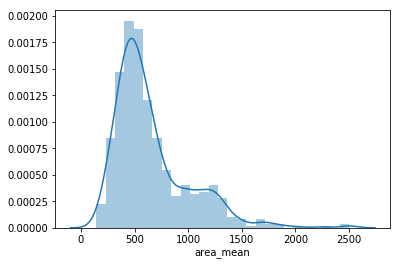

In [15]:
_ = sns.distplot(data_breast['area_mean'])

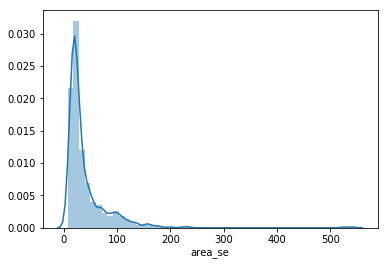

In [16]:
_ = sns.distplot(data_breast['area_se'])

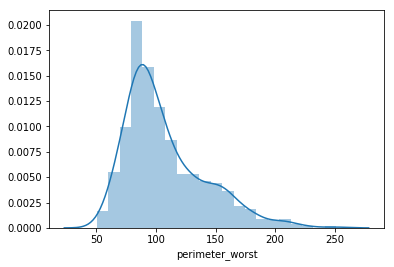

In [17]:
_ = sns.distplot(data_breast['perimeter_worst'])

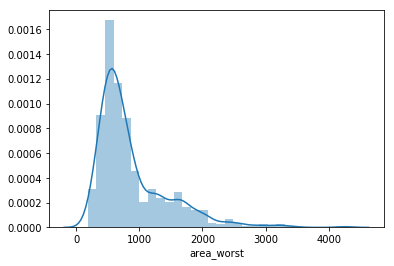

In [18]:
_ = sns.distplot(data_breast['area_worst'])

6. С помощью статистических методов проверить взаимосвязи между переменными.

* Проверим гипотезу, что математическое ожидание параметра area_mean не зависит от содержимого биопата.

In [19]:
from scipy import stats

In [20]:
# T-test
# H0 - математическое ожидание параметра area_mean не зависит от содержимого биопата.
# H1 - математическое ожидание параметра area_mean зависит от содержимого биопата.

stats.ttest_ind(data_breast[data_breast.diagnosis == 'B'].area_mean, 
                data_breast[data_breast.diagnosis == 'M'].area_mean)


Ttest_indResult(statistic=-23.938687235690992, pvalue=4.734564310307344e-88)

**Вывод:** следует принять гипотезу H1 

* Проверим гипотезу, что математическое ожидание параметра area_se не зависит от содержимого биопата.

In [21]:
# T-test
# H0 - математическое ожидание параметра area_se не зависит от содержимого биопата.
# H1 - математическое ожидание параметра area_se зависит от содержимого биопата.

stats.ttest_ind(data_breast[data_breast.diagnosis == 'B'].area_se, 
                data_breast[data_breast.diagnosis == 'M'].area_se)


Ttest_indResult(statistic=-15.609342900255001, pvalue=5.8955213926058635e-46)

**Вывод:** следует принять гипотезу H1

* Проверим гипотезу, что математическое ожидание параметра perimeter_worst не зависит от содержимого биопата.

In [22]:
# T-test
# H0 - математическое ожидание параметра perimeter_worst не зависит от содержимого биопата.
# H1 - математическое ожидание параметра perimeter_worst зависит от содержимого биопата.

stats.ttest_ind(data_breast[data_breast.diagnosis == 'B'].perimeter_worst, 
                data_breast[data_breast.diagnosis == 'M'].perimeter_worst)


Ttest_indResult(statistic=-29.965717392710303, pvalue=5.771397139668621e-119)

**Вывод:** следует принять гипотезу H1

* Проверим гипотезу, что математическое ожидание параметра area_worst не зависит от содержимого биопата.

In [23]:
# T-test
# H0 - математическое ожидание параметра area_worst не зависит от содержимого биопата.
# H1 - математическое ожидание параметра area_mean зависит от содержимого биопата.

stats.ttest_ind(data_breast[data_breast.diagnosis == 'B'].area_worst, 
                data_breast[data_breast.diagnosis == 'M'].area_worst)


Ttest_indResult(statistic=-25.721590260589004, pvalue=2.828847704286693e-97)

**Вывод:** следует принять гипотезу H1 

7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

*В связи с тем, что датасет относительно небольшой, а переменных достаточно много, лучший результат даст сокращение размерностей. Генерация новых переменных может привести к переобучению модели*

8. Рассчитать Feature Selection для выбранных переменных.

In [24]:
# Преобразуем целевую переменную в числовую: 'B' -> 0, 'M' -> 1
data_breast['target'] = data_breast['diagnosis'].apply(lambda x: 1 if x == 'B' else 0)
data_breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
#Разобъем выборку на тренировочную и тестовую в соотношении 80 : 20
from random import sample
ids_test = sample(data_breast['id'].tolist(), data_breast.shape[0] // 5)
ids_train = [id_ for id_ in data_breast['id'].tolist() if id_ not in ids_test]

data_breast_train = data_breast[data_breast.id.isin(ids_train)]
data_breast_test = data_breast[data_breast.id.isin(ids_test)]

print(
    ' Размер обучающей выборки: {} элементов. \n Размер тестовой выборки: {} элементов'.format(
        len(ids_train), 
        len(ids_test)
    )
)

 Размер обучающей выборки: 456 элементов. 
 Размер тестовой выборки: 113 элементов


In [26]:
# Применим к обучающей выборке метод главных компонент:
from sklearn.decomposition import PCA

X = data_breast_train[features_list].as_matrix()
y = data_breast_train.target

pca = PCA(n_components=X.shape[1]).fit(X)
for i in range(1, X.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))
    if sum(pca.explained_variance_ratio_[:i]) > 0.99999:
        break
    
    

/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


n-components=1, explained variance 0.982
n-components=2, explained variance 0.998
n-components=3, explained variance 1.000
n-components=4, explained variance 1.000
n-components=5, explained variance 1.000
n-components=6, explained variance 1.000


**Вывод:** 2 переменных объясняют 99,8% дисперсии.

In [27]:
# Для сжатия пространства фичей боспользуемся методом Лассо.
from sklearn.linear_model import LinearRegression, Lasso

In [28]:
ls = Lasso().fit(X, y)
print(ls.intercept_)
print(ls.coef_)

1.316612111374862
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -8.07100897e-05
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.70289404e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.44540782e-03 -4.22910238e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


In [29]:
# Выведем лучшие фичи:

best_features = []

for i in range(X.shape[1]):
    if abs(ls.coef_[i]) > 1e-7:
        best_features.append(features_list[i])

best_features

['area_mean', 'area_se', 'perimeter_worst', 'area_worst']

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [31]:
est = smf.ols('target ~ ' + ' + '.join(best_features), data=data_breast).fit()
rss = np.sum(est.resid ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (data_breast.shape[0] - 3 - 1)))
print('R^2 = ', est.rsquared)
est.summary().tables[1]

RSS: 47.05824053489626
RSE: 0.288598200446055
R^2 =  0.6462113674705886


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.4836,0.104,23.879,0.000,2.279,2.688
area_mean,0.0006,0.000,4.155,0.000,0.000,0.001
area_se,-0.0005,0.000,-1.047,0.296,-0.001,0.000
perimeter_worst,-0.0246,0.002,-12.649,0.000,-0.028,-0.021
area_worst,0.0005,0.000,4.182,0.000,0.000,0.001


In [32]:
# Опытным путем устанавливаем, что удаление переменной area_mean практически не влияет на точность
best_features = [el for el in best_features if el not in ['area_mean']]
est = smf.ols('target ~ ' + ' + '.join(best_features), data=data_breast).fit()
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (data_breast.shape[0] - 2 - 1)))
print('R^2 = ', est.rsquared)
est.summary().tables[1]

RSS: 47.05824053489626
RSE: 0.28834314233131797
R^2 =  0.6353815448943259


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.3786,0.102,23.244,0.000,2.178,2.580
area_se,-3.617e-06,0.000,-0.008,0.994,-0.001,0.001
perimeter_worst,-0.0213,0.002,-11.833,0.000,-0.025,-0.018
area_worst,0.0006,0.000,5.134,0.000,0.000,0.001


*Таким образом, оставляем только 2 фичи*

9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

* Используем линейную регрессию

In [33]:
from sklearn.linear_model import LogisticRegression
X = data_breast_train[best_features].as_matrix()
y = data_breast_train.target
lm = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='multinomial').fit(X, y)
print(lm.intercept_)
print(lm.coef_)

[10.42556244]
[[-0.02202265 -0.0959451   0.00094743]]


/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [34]:
# Рвссчитываем вероятность классов
LR_predict_proba_train = lm.predict_proba(X)
X_test = data_breast_test[best_features].as_matrix()
y_test = data_breast_test.target
LR_predict_proba_test = lm.predict_proba(X_test)

/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# Проверяем тестом ROC-AUC
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_train = np.round(roc_auc_score(y, LR_predict_proba_train[:,1]), 2)
roc_auc_test = np.round(roc_auc_score(y_test, LR_predict_proba_test[:,1]), 2)
print("AUC train: ", roc_auc_train)
print("AUC test: ", roc_auc_test)

AUC train:  0.98
AUC test:  0.96


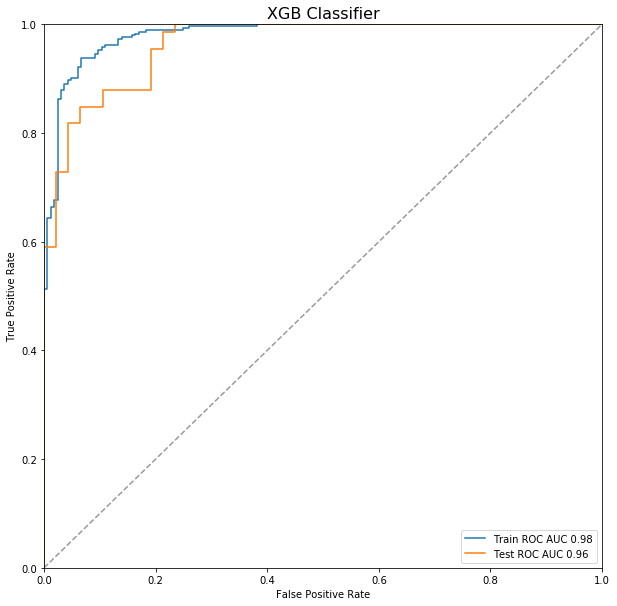

In [36]:
import matplotlib.pyplot as plt

fpr_train, tpr_train, thresholds_train = roc_curve(y, LR_predict_proba_train[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, LR_predict_proba_test[:,1])

plt.rcParams['figure.figsize'] = (10.0, 10.0)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

* Используем деревья решений

In [37]:
from sklearn import tree
X = data_breast_train[best_features].as_matrix()
y = data_breast_train.target
dt = tree.DecisionTreeClassifier().fit(X, y)
dt.feature_importances_

/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0.10008045, 0.82979276, 0.07012679])

In [38]:
# Рвссчитываем вероятность классов
DT_predict_proba_train = dt.predict_proba(X)
DT_predict_proba_test = dt.predict_proba(X_test)

In [39]:
# Проверяем тестом ROC-AUC
roc_auc_train = np.round(roc_auc_score(y, DT_predict_proba_train[:,1]), 2)
roc_auc_test = np.round(roc_auc_score(y_test, DT_predict_proba_test[:,1]), 2)
print("AUC train: ", roc_auc_train)
print("AUC test: ", roc_auc_test)

AUC train:  1.0
AUC test:  0.86


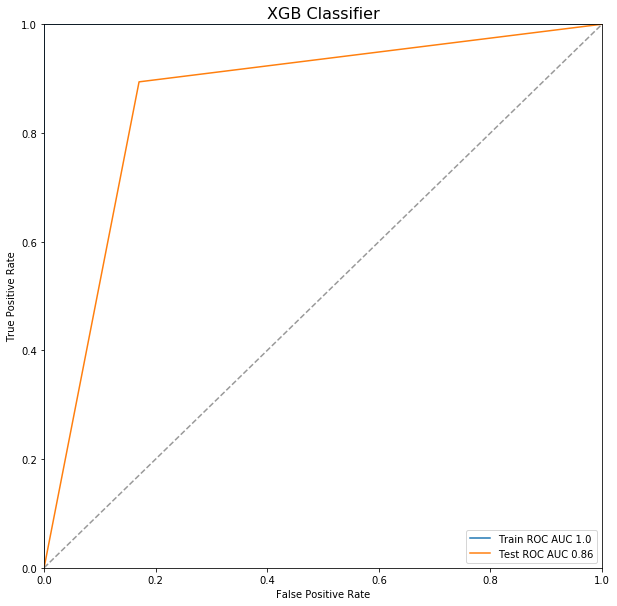

In [40]:
fpr_train, tpr_train, thresholds_train = roc_curve(y, DT_predict_proba_train[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, DT_predict_proba_test[:,1])

plt.rcParams['figure.figsize'] = (10.0, 10.0)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()

10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [41]:
# Метрика Accuracy
from sklearn.metrics import accuracy_score
print('Logistic regression: {}'.format(accuracy_score(y_test, LR_predict_proba_test[:,1].round())))
print('Decision tree: {}'.format(accuracy_score(y_test, DT_predict_proba_test[:,1])))


Logistic regression: 0.8761061946902655
Decision tree: 0.8672566371681416


In [42]:
# Метрика F1-Score
from sklearn.metrics import jaccard_similarity_score
print('Logistic regression: {}'.format(jaccard_similarity_score(y_test, LR_predict_proba_test[:,1].round())))
print('Decision tree: {}'.format(jaccard_similarity_score(y_test, DT_predict_proba_test[:,1])))


Logistic regression: 0.8761061946902655
Decision tree: 0.8672566371681416


In [43]:
# Метрика Precision
from sklearn.metrics import precision_score
print('Logistic regression: {}'.format(precision_score(y_test, LR_predict_proba_test[:,1].round())))
print('Decision tree: {}'.format(precision_score(y_test, DT_predict_proba_test[:,1])))


Logistic regression: 0.8714285714285714
Decision tree: 0.8805970149253731


In [44]:
# Метрика Recall
from sklearn.metrics import recall_score
print('Logistic regression: {}'.format(recall_score(y_test, LR_predict_proba_test[:,1].round())))
print('Decision tree: {}'.format(recall_score(y_test, DT_predict_proba_test[:,1])))

Logistic regression: 0.9242424242424242
Decision tree: 0.8939393939393939
